## Convergence speed

*1. Show with the definition that the sequence $\left\{ \dfrac{1}{k} \right\}_{k=1}^\infty$ does not have a linear convergence rate (but it converges to zero).*

Proof by contradiction \
$\exists q \in (0, 1)\ \exists C>0\ \ \forall k \ge 1 \rightarrow \frac{1}{k} \le Cq^k$\
So $C^{-1} \le kq^k\rightarrow 0 \ \ (\forall \varepsilon>0 \ \exists N=\varepsilon:\ \forall k\ge N \rightarrow |kq^k|<k<\varepsilon)$, but C should be greater than 0 - contradiction

*2. Determine the convergence or divergence of a given sequence $r_{k} = 0.707^k$.*

$\forall ɛ>0 \ \exists N=[\frac{lnɛ}{ln0.707}]:\ \forall k\ge N  \rightarrow |0.707^k|<ɛ$

So $r_k \underset{k \to \infty}{\longrightarrow} 0$

*3. Determine the convergence or divergence of a given sequence $r_{k} = 0.707^{2^k}$*

The sequence diverges: $\ \exists ɛ =1 \ \forall N \in \mathbb{N} \ \exists k\ge N: \ |{0.707^2}^k|>1^k=1$

*4. Determine the convergence or divergence of a given sequence $r_{k} = \frac{1}{k!}$.*


$\forall ɛ>0 \ \exists N=[\frac{1}{ɛ}]:\ \forall k\ge N  \rightarrow |\frac{1}{k!}|\le \frac{1}{k}<ɛ$

So $r_k \underset{k \to \infty}{\longrightarrow} 0$

##Gradient descent, [Hobbit village](https://courses.cs.ut.ee/MTAT.03.227/2015_spring/uploads/Main/home-exercises-5.pdf)

In [53]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import random
import seaborn as sns
import copy
import time
import scipy 
from scipy.optimize import LinearConstraint

sns.set(style="darkgrid", font_scale=1.4)
np.random.seed(42)

Below one can find function plotting the village

In [ ]:
def plot_village(coordinates, l=1):
    # Checking, that all the coordinates are less than l
    assert (coordinates <= l).all(), 'All the houses should be in a village'
    
    # Draw horizontal line
    plt.hlines(0, 0, l)
    plt.xlim(0, l)
    plt.ylim(-0.5, 0.5)
    
    # Draw house points
    y = np.zeros(np.shape(coordinates))
    plt.title('The Hobbit Village')
    plt.plot(coordinates,y,'o',ms = 10)
    plt.axis('off')
    plt.xlabel('Coordinates')
    fig = plt.gcf()
    fig.set_size_inches(15, 1)
    plt.show()

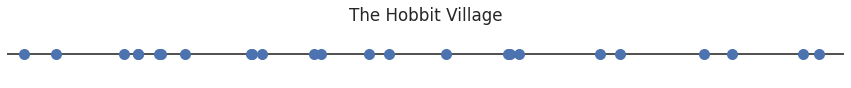

In [ ]:
N = 25
l = 1
x = np.random.rand(N)*l
    
plot_village(x, l)

The inhabitants of a one-dimensional village want to connect to the Internet, so they need a central service station from which a cable will stretch to all the houses in the village. Let the price of the cable to be pulled from the station to each house independently be determined by some function p(d) . Then it is clear that the village will have to pay the following amount for access to the World Wide Web:
$$
P(w, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p(|w - x_i|)
$$
$w$ - station location, $x_i$ - location of $i$ house.

Write analytical solution $w^*$ for minimization $P(w,x)$, if $p(d) = d^2$

**Решение**

$P(w)=\sum\limits_{i=1}^N (w-x_i)^2=\sum\limits_{i=1}^N (w^2 -2x_i w +x_i^2)=Nw^2-2(\sum\limits_{i=1}^N x_i)w + \sum\limits_{i=1}^N x_i^2$\
$P(w)$ is a parabola opening to the top, so it has its minimum in its vertex, 
which is $w^* = \frac{\sum\limits_{i=1}^N x_i}{N}$

Write loss function $P(x,w)$

In [ ]:
def P(x, w):
    return ((x-w)**2).sum()

Plot loss function on the range $(0, l)$

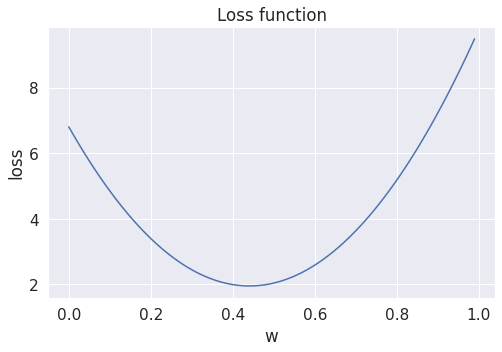

In [ ]:
w = np.arange(0, l, 0.01)
plt.figure(figsize=(8, 5))
plt.plot(w, [P(x, w_i) for w_i in w])
plt.title("Loss function")
plt.xlabel("w")
plt.ylabel("loss")
plt.show()

Write gradient of loss function

In [ ]:
def dP(x, w):
    return 2*(N*w-x.sum())

Plot gradient of loss function on the range $(0,l)$. Which point on the graph is of particular interest? Why?

**Point where gradient is zero as it is necessary condition of extremum.**

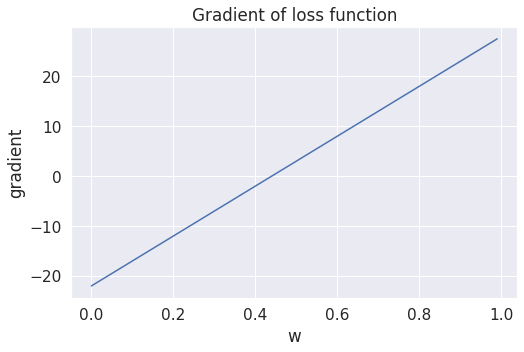

In [ ]:
w = np.arange(0, l, 0.01)
plt.figure(figsize=(8, 5))
plt.plot(w, [dP(x, w_i) for w_i in w])
plt.title("Gradient of loss function")
plt.xlabel("w")
plt.ylabel("gradient")
plt.show()

Write function `gradient_descent`, which returns $w_k$ after a fixed number of steps.   

$$
w_{k+1} = w_k - \mu \nabla P(w_k)
$$

In [ ]:
def gradient_descent(step, step_number, x, start_w):
    w_history = []
    w = start_w
    for i in range(step_number):
      w -= step*dP(x, w)
      w_history.append(w)
    return w_history

Modify `gradient_descent` to return all optimization trajectory.
Plot loss function trajectory for the following learning rates $\mu = 0.01, 0.1, 0.15, 0.19, 0.20, 0.21$.   
Draw conclusions.

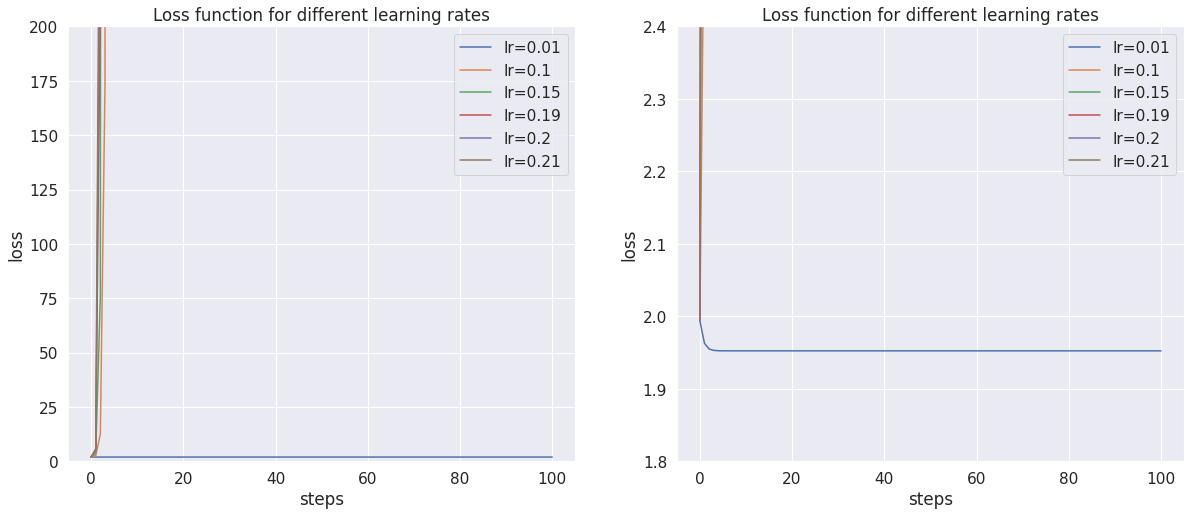

In [ ]:
step_values = [0.01, 0.1, 0.15, 0.19, 0.2, 0.21]
step_number = 100
start_w = 0.4

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
for step in step_values:
    w_hist = [start_w] + gradient_descent(step, step_number, x, start_w)
    for ax_i in range(2):
      ax[ax_i].plot(np.arange(0, step_number + 1, 1), [P(x, w_i) for w_i in w_hist], label='lr='+str(step))
for ax_i in range(2):
  ax[ax_i].set_title('Loss function for different learning rates')
  ax[ax_i].set_xlabel('steps')
  ax[ax_i].set_ylabel('loss')
  ax[ax_i].legend()
ax[0].set_ylim(0, 200)
ax[1].set_ylim(1.8, 2.4)
fig.show()

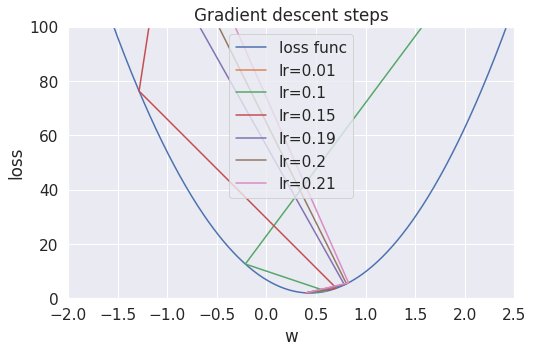

In [ ]:
w = np.arange(-2, 3, 0.01)
plt.figure(figsize=(8, 5))
plt.plot(w, [P(x, w_i) for w_i in w], label='loss func')
for step in step_values:
    w_hist = [start_w] + gradient_descent(step, step_number, x, start_w)
    plt.plot(w_hist, [P(x, w_i) for w_i in w_hist], label='lr='+str(step))
plt.title("Gradient descent steps")
plt.xlabel("w")
plt.ylabel("loss")
plt.xlim(-2, 2.5)
plt.ylim(0, 100)
plt.legend()
plt.show()

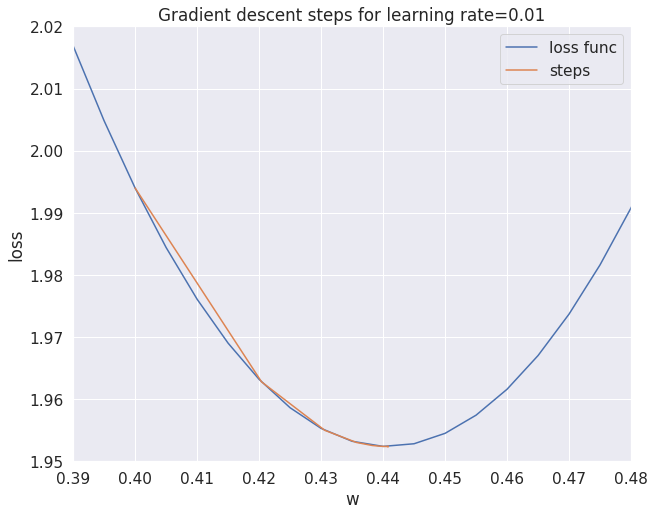

In [ ]:
w = np.arange(0, 1, 0.005)
plt.figure(figsize=(10, 8))
plt.plot(w, [P(x, w_i) for w_i in w], label='loss func')
w_hist = [start_w] + gradient_descent(0.01, step_number, x, start_w)
plt.plot(w_hist, [P(x, w_i) for w_i in w_hist], label='steps')
plt.title("Gradient descent steps for learning rate=0.01")
plt.xlabel("w")
plt.ylabel("loss")
plt.ylim(1.95, 2.02)
plt.xlim(0.39, 0.48)
plt.legend()
plt.show()

**Conclusions: we should use small learning rate (step) in gradient descent. $w_k$ doesn't converge when big steps are used, because it jumps over the minimum to the point where the absolute value of descent is even biggwer. So $w_k$ move away from minimum with time. Meanwhile, gradient descent with small learning rate showed a good result and found the minimum.**

## Projected gradient descent

Find projection on the $S$ set $\pi_S (y) = \pi$ if: 

$$
S = \{x \in \mathbb{R}^n \mid Ax = b, A \in \mathbb{R}^{m \times n}, b \in \mathbb{R}^{m}\}, y \notin S
$$

Hint: Check [fmin.xyz](https://fmin.xyz) 

**Решение** 

For following problem:

$$
\left\{ \begin{array}{l} 
\displaystyle \big\lVert Ax - b \big\rVert_2^2 \longrightarrow \min_{x \in \mathbb{R}^n}, \\\\[-1em]
Cx = d.
\end{array} \right. \ \ \begin{array}{l}
A \in \mathbb{R}^{m \times n}, \ m \geq n, \ \text{rg}\, A = n \\
C \in \mathbb{R}^{k \times n}, \ k \leq n, \ \text{rg}\, C = k
\end{array} \ b \in \mathbb{R}^m, \ d \in \mathbb{R}^k
$$


* Write KKT conditions;



* Find $x^\ast$ - solution;


$L(x, \lambda) = \displaystyle \big\lVert Ax - b \big\rVert_2^2 + <\lambda,Cx -d>$ \\
KKT conditions:
$$
\left\{ \begin{array}{l} 
\frac{dL}{dx} = 2<Ax - b, A >+ <\lambda, C> = 2A^T(Ax - b) + C^T\lambda = 0 \\\\[-1em]
Cx = d
\end{array} \right.
$$ \\
$2A^T(Ax - b) + C^T\lambda = 0,\ \ x =\frac{1}{2} (A^TA)^{-1}(2A^Tb - C^T\lambda)$ \\
$C\frac{1}{2} (A^TA)^{-1}(2A^Tb - C^T\lambda) = d \Rightarrow \ \lambda = (\frac{1}{2}C(A^TA)^{-1}C^T)^{-1}(C(A^TA)^{-1}A^Tb - d)$ \\
And finally 
$x =\frac{1}{2} (A^TA)^{-1}(2A^Tb - C^T((\frac{1}{2}C(A^TA)^{-1}C^T)^{-1}(C(A^TA)^{-1}A^Tb - d)))$

Implement projected gradient descent for following task.

$$
\left\{ \begin{array}{l} 
\displaystyle \big\lVert Ax - b \big\rVert_2^2 \longrightarrow \min_{x \in \mathbb{R}^n}, \\\\[-1em]
Cx = d.
\end{array} \right. \ \ \begin{array}{l}
A \in \mathbb{R}^{m \times n}, \ m \geq n, \ \text{rg}\, A = n \\
C \in \mathbb{R}^{k \times n}, \ k \leq n, \ \text{rg}\, C = k
\end{array} \ b \in \mathbb{R}^m, \ d \in \mathbb{R}^k
$$

Compare with analytical solution and `scipy.optimize`

In [56]:
def grad(w, A, b):
    return 2*(A @ w - b).T @ A

def projected_gradient_descent(step, step_number, start_w, A, b, C, d): 
    w_hist = []
    w = start_w
    for i in range(step_number):
        w -= step* grad(w, A, b)
        # take projection
        w -= C.T @ np.linalg.inv(C @ C.T) @ (C@w - d) 
        w_hist.append(w)
    return w_hist

In [61]:
def generate_matrixes(n, m, k):
  A = np.random.random((m, n))
  while np.linalg.matrix_rank(A) != n:
      A = np.random.random((n, m))
  b = np.random.random(m)
  C = np.random.random((k, n))
  while np.linalg.matrix_rank(C) != k:
      C = np.random.random((k, n))
  d = np.random.random(k)
  return A, b, C, d

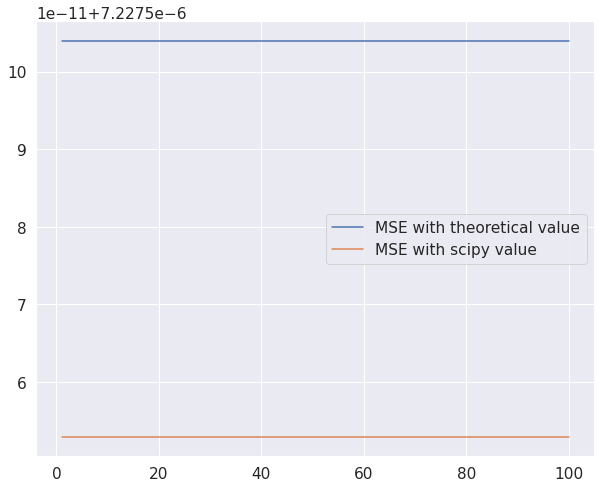

In [72]:
A, b, C, d = generate_matrixes(5, 8, 3)

start_w = np.zeros(5)
w_history = projected_gradient_descent(1e-2, 100, start_w, A, b, C, d)

# scipy.optimize
f = lambda x: (A@x - b).T @ (A@x - b)
linear_constraint = LinearConstraint(C, d, d)
scipy_w = scipy.optimize.minimize(f, start_w, method='trust-constr', constraints=[linear_constraint])

# true value
ATA = np.linalg.inv(A.T@A)
lambd = np.linalg.inv(0.5*C@ATA@C.T) @ (C@ATA@A.T@b - d)
real_w = 0.5*ATA@(2*A.T@b - C.T@lambd)

plt.figure(figsize=(10, 8))
plt.plot(np.arange(1, 101), [((w-real_w)**2).mean() for w in w_history], label='MSE with theoretical value')
plt.plot(np.arange(1, 101), [((w-scipy_w['x'])**2).mean() for w in w_history], label='MSE with scipy value')
plt.legend()
plt.show()

**Conclusion: I have a mistake in theoretical value of minimum**

##Newtown Method

Докажите, что для метода Ньютона обладает афинной инвариантностью, т.е. если есть преобразование координат
$\hat{f}(z) = f(x)$, где $x = Sz + s$, $s \in \mathbb{R}^n$, $S \in \mathbb{R}^{n \times n}$ то будет выполняться:

$$\nabla \hat f(z) = S^T \nabla f(x)$$

$$\nabla^2 \hat{f} (z) = S^T \nabla f(x) S$$

**Решение**
$$d \hat f(z) =df(Sz+s)=<\nabla f(Sz+s), d(Sz+s)>=<  S^T \nabla f(Sz+s), dz>=<S^T \nabla f(x), dz>$$

$$d<S^T \nabla f(x), dz>=<S^T<\nabla^2f(x), Sdz_1>, dz>=<S^T(\nabla^2f(x))^TSdz_1, dz>=<S^T\nabla^2f(x)Sdz, dz_1>$$

Реализуйте на языке python метод Ньютона для минимизации следующих функций:
* Квадратичная форма $f(x) = \frac{1}{2}x^TAx + b^Tx$, $x \in \mathbb{R}^n$, $A \in \mathbb{S}_+^{n \times n}$. Попробуйте n = 2, 50, 228
* Функция Розенброка $f(x,y) = (1 - x)^2 + 100(y - x^2)^2 $

Сравните реализованный Вами метод и метод [BFGS](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html) из библиотеки scipy , а так же его модификацию [L-BFGS](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html) в решении
задачи минимизации описанных выше функций. точку старта необходимо инициализировать одинаковую для всех
методов в рамках одного запуска. Необходимо провести не менее 10 запусков для каждого метода на каждой функции до
достижения того критерия остановки, который вы выберете (например, расстояние до точки оптимума - во всех задачах
мы её знаем).

В качестве результата нужно для каждого метода и каждой задачи для различных размерностей(в задаче квадратичного программирования) вывести число итераций для достижения необходимой точности сходимости и время работы метода (усредненнить по числу запусков количество
итераций, необходимых для сходимости и времени работы).

P.S. если в силу каких то причин Вам не удалось сделать задание полностью, попробуйте сфокусироваться хотя бы на его
части.

In [43]:
def Newton(f, gradf, hessf, start_w, epsilon=1e-2, num_iter=100, *args):
    w = start_w.copy()
    for i in range(num_iter):
        grad = gradf(w, *args)
        hess = hessf(w, *args)
        #next point is current point - hessian^{-1} * gradient
        step = np.linalg.solve(hess, grad)
        w -= step
        if np.linalg.norm(gradf(w, *args)) < epsilon:
              num_iter = i + 1
              break
    return num_iter

In [33]:
f = lambda x, A, b: x.T @ A @ x / 2 + b.T @ x
gradf = lambda x, A, b: A @ x + b.T
hessf = lambda x, A, b: A

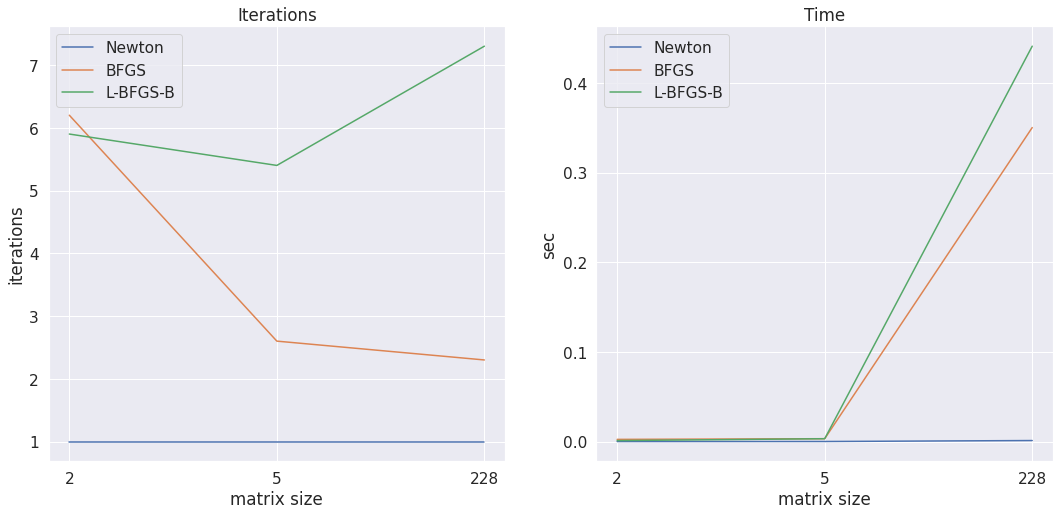

In [35]:
generate_positive_semidefinite = lambda n: np.random.random((n, n)) #for generating A
generate_b = lambda n: np.random.random(n)


n = [2, 5, 228]
newton_time_history = []
newton_iter_history = []
bfgs_time_history = []
bfgs_iter_history = []
lbfgs_time_history = []
lbfgs_iter_history = []
run_num = 10

for size in n:
    newton_time = 0
    newton_iter = 0
    bfgs_time = 0
    bfgs_iter = 0
    lbfgs_time = 0
    lbfgs_iter = 0
    for run in range(run_num):
        A = generate_positive_semidefinite(size)
        b = generate_b(size)
        x_start = np.zeros(size)

        #Newton
        t = time.perf_counter()
        newton_iter += Newton(f, gradf, hessf, x_start, 1e-4, 100, A, b)
        newton_time += time.perf_counter() - t

        #BFGS
        t = time.perf_counter()
        bfgs = scipy.optimize.minimize(f, x_start, method='BFGS', args=(A, b))
        bfgs_time += time.perf_counter() - t
        bfgs_iter += bfgs['nit']

        #L-BFGS-B
        t = time.perf_counter()
        lbfgs = scipy.optimize.minimize(f, x_start, method='L-BFGS-B', args=(A, b))
        lbfgs_time += time.perf_counter() - t
        lbfgs_iter += lbfgs['nit']

    #save average time and iterations
    newton_time_history.append(newton_time/run_num)
    newton_iter_history.append(newton_iter/run_num)
    bfgs_time_history.append(bfgs_time/run_num)
    bfgs_iter_history.append(bfgs_iter/run_num)
    lbfgs_time_history.append(lbfgs_time/run_num)
    lbfgs_iter_history.append(lbfgs_iter/run_num)

# Output
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
n_val = ["2", "5", "228"]
ax[0].plot(n_val, newton_iter_history, label='Newton')
ax[0].plot(n_val, bfgs_iter_history, label='BFGS')
ax[0].plot(n_val, lbfgs_iter_history, label='L-BFGS-B')
ax[1].plot(n_val, newton_time_history, label='Newton')
ax[1].plot(n_val, bfgs_time_history, label='BFGS')
ax[1].plot(n_val, lbfgs_time_history, label='L-BFGS-B')
ax[0].set_title('Iterations')
ax[1].set_title('Time')
ax[0].set_xlabel('matrix size')
ax[0].set_ylabel('iterations')
ax[1].set_xlabel('matrix size')
ax[1].set_ylabel('sec')
ax[0].legend()
ax[1].legend()
fig.show()

**Newton method converges much faster for this problem. Let's see how it works on another function.**

In [48]:
f = lambda x: (1-x[0])**2 + 100*(x[1]-x[0]**2)**2
gradf = lambda x: np.array([-2*(1-x[0])-400*x[0]*(x[1]-x[0]**2), 200*(x[1]-x[0]**2)])
hessf = lambda x: np.array([[2-400*(x[1]-x[0]**2)+800*x[0]**2, -400*x[0]], [-400*x[0], 200]])

In [51]:
run_num = 10
newton_time = 0
newton_iter = 0
bfgs_time = 0
bfgs_iter = 0
lbfgs_time = 0
lbfgs_iter = 0
for run in range(run_num):
    x_start = np.random.random(2)

    #Newton
    t = time.perf_counter()
    newton_iter += Newton(f, gradf, hessf, x_start, epsilon=1e-3)
    newton_time += time.perf_counter() - t

    #BFGS
    t = time.perf_counter()
    bfgs = scipy.optimize.minimize(f, x_start, method='BFGS')
    bfgs_time += time.perf_counter() - t
    bfgs_iter += bfgs['nit']

    #L-BFGS-B
    t = time.perf_counter()
    lbfgs = scipy.optimize.minimize(f, x_start, method='L-BFGS-B')
    lbfgs_time += time.perf_counter() - t
    lbfgs_iter += lbfgs['nit']

#Output
print("             Iterations        Time (sec)")
print("Newton          {}            {}".format(newton_iter/run_num, newton_time/run_num))
print("BFGS            {}           {}".format(bfgs_iter/run_num, bfgs_time/run_num))
print("L-BFGS-B        {}           {}".format(lbfgs_iter/run_num, lbfgs_time/run_num))

             Iterations        Time (sec)
Newton          5.0            0.0002455709000969364
BFGS            17.7           0.002397038999970391
L-BFGS-B        20.1           0.001004605999969499


**Newton still wins**

## Linear Programming

Random Corp is producing covers for following products:

* phones
* headphones
* laptops

The company’s production facilities are such that if we devote the entire production to headphones covers, we can produce 5000 of
them in one day. If we devote the entire production to phone covers or laptop covers, we can produce 4000 or 2000 of them in one
day.
The production schedule is one week (6 working days), and the week’s production must be stored before distribution. Storing 1000
headphones covers (packaging included) takes up 30 cubic feet of space. Storing 1000 phone covers (packaging included) takes up
50 cubic feet of space, and storing 1000 laptop covers (packaging included) takes up 220 cubic feet of space. The total storage
space available is 6000 cubic feet.
Due to commercial agreements with Random Corp has to deliver at least 4500 headphones covers and 3000 laptop covers per week
in order to strengthen the product’s diffusion.
The marketing department estimates that the weekly demand for headphones covers, phone, and laptop covers does not exceed
9000 and 14000, and 7000 units, therefore the company does not want to produce more than these amounts for headphones, phone,
and laptop covers.
Finally, the net prot per each headphones cover, phone cover, and laptop cover is $5, $7, and $12, respectively.
The aim is to determine a weekly production schedule that maximizes the total net prot.

Find the solution to the problem using [PuLP](https://coin-or.github.io/pulp/)

In [ ]:
!pip install pulp
from pulp import *

In [ ]:
problem = LpProblem("net_prot_maximization", LpMaximize)

# variables (number of corresponding units)
headphones = LpVariable("h", 4500, 9000, LpInteger)
phones = LpVariable("p", None, 14000, LpInteger)
laptops = LpVariable("l", 3000, 7000, LpInteger)

# object function
problem += 5*headphones + 7*phones + 12*laptops, "obj"
# "such that" section (restrictions)
# let's comsider production space
#problem += 4*headphones + 5*phones + 10*laptops <= 6000*20
problem += (1*headphones)/5000 + (1*phones)/4000 + (1*laptops)/2000 <= 6  # 1*var is used for casting LpInteger to python's int
# and storage space
problem += (30*headphones + 50*phones + 220*laptops)/1000 <= 6000

In [ ]:
problem.solve()
print("Solution:")
print(" Number of headphones = {}".format(headphones.value()))
print(" Number of phones     = {}".format(phones.value()))
print(" Number of laptops    = {}".format(laptops.value()))

Solution:
 Number of headphones = 5000.0
 Number of phones     = 14000.0
 Number of laptops    = 3000.0
